In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers
from keras import optimizers

In [3]:
import matplotlib.pyplot as plt

In [4]:
import keras

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import numpy as np

In [7]:
num_classes = 2

In [8]:
vgg_conv = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

In [9]:
layer_dict = dict([(layer.name, layer) for layer in vgg_conv.layers])

In [10]:
vgg_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
x = layer_dict['block5_pool'].output

In [12]:
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(2, activation='softmax')(x)

In [13]:
custom_model = models.Model(input=vgg_conv.input, output=x)

/home/spasenov/venv/science/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [14]:
# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:19]:
    layer.trainable = False

In [15]:
# Do not forget to compile it
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='rmsprop',
                     metrics=['accuracy'])

In [16]:
import glob

In [17]:
import cv2

In [18]:
images = []
labels = []

In [19]:
for fn in glob.glob('/home/spasenov/gate_dir/datasets/caltech/009.bear/*.jpg'):
    oriimg = cv2.imread(fn)
    image = cv2.resize(oriimg,(224,224),interpolation=cv2.INTER_AREA)
    images.append(image)
    labels.append(0)

In [20]:
for fn in glob.glob('/home/spasenov/gate_dir/datasets/caltech/213.teddy-bear/*.jpg'):
    oriimg = cv2.imread(fn)
    image = cv2.resize(oriimg,(224,224),interpolation=cv2.INTER_AREA)
    images.append(image)
    labels.append(1)

In [21]:
images = np.array(images)

In [22]:
labels = np.array(labels)

In [23]:
X_train_imgs, X_test_imgs, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=15)

In [24]:
X_train = X_train_imgs / 255.0
X_test = X_test_imgs / 255.0

In [25]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [26]:
history = custom_model.fit(X_train, y_train,
          batch_size=8,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 136 samples, validate on 67 samples
Epoch 1/10
136/136 [==============================] - 5s 37ms/step - loss: 0.5747 - acc: 0.7868 - val_loss: 0.3995 - val_acc: 0.7910
Epoch 2/10
136/136 [==============================] - 3s 23ms/step - loss: 0.3231 - acc: 0.8824 - val_loss: 0.4937 - val_acc: 0.8507
Epoch 3/10
136/136 [==============================] - 3s 23ms/step - loss: 0.1883 - acc: 0.9338 - val_loss: 0.3427 - val_acc: 0.8806
Epoch 4/10
136/136 [==============================] - 3s 23ms/step - loss: 0.0573 - acc: 0.9779 - val_loss: 0.0959 - val_acc: 0.9552
Epoch 5/10
136/136 [==============================] - 3s 23ms/step - loss: 0.1461 - acc: 0.9559 - val_loss: 0.1090 - val_acc: 0.9254
Epoch 6/10
136/136 [==============================] - 3s 23ms/step - loss: 0.0463 - acc: 0.9853 - val_loss: 0.3974 - val_acc: 0.8806
Epoch 7/10
136/136 [==============================] - 3s 23ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.1523 - val_acc: 0.9403
Epoch 8/10
136/136 [====

In [27]:
preds = custom_model.predict(X_test)

In [28]:
pred_labels = np.argmax(preds, axis=1)

bear


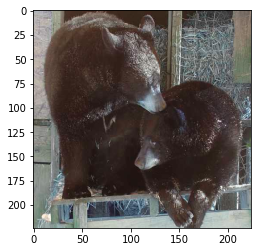

teddy-bear


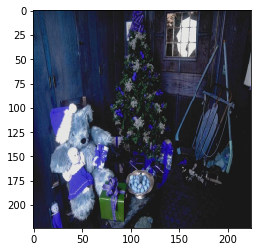

bear


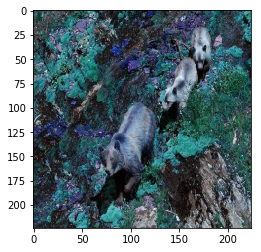

teddy-bear


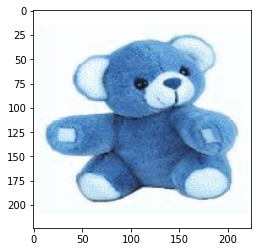

bear


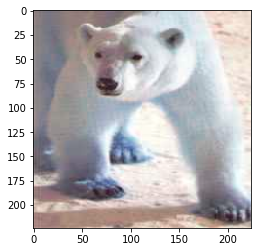

In [29]:
for i in range(5):
    if pred_labels[i] == 0:
        print('bear')
    else:
        print('teddy-bear')
    plt.imshow(X_test[i])
    plt.show()